In [1]:
import pandas as pd 
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import numpy as np
import datetime

In [2]:
emotions = pd.read_csv("./234_sentiment_date_sorted_merged.csv")
emotions.head()

,date,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,neutral
0,2020-02-07,547,855,390,1058,525,698,414,1118,1009.0
1,2020-02-08,5556,7053,3919,9604,3143,6630,3633,7401,14999.0
2,2020-02-09,5118,6432,3609,8481,2754,6008,3401,6554,11332.0
3,2020-02-10,6397,9029,4069,11477,3619,7330,3786,9137,18234.0
4,2020-02-11,9861,11628,7071,16726,4781,12414,5817,12749,23528.0


In [3]:
cases = pd.read_csv("./covid_19_data.csv")

grp = cases.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered'].agg('sum')
grp = grp.reset_index()

confirmed_sum = grp['Confirmed']
ind = [confirmed_sum[0]]
for i in range(1,len(confirmed_sum)):
    ind.append(confirmed_sum[i]-confirmed_sum[i-1])
grp['New_Confirmed'] = ind

deaths_sum = grp['Deaths']
ind = [deaths_sum[0]]
for i in range(1,len(deaths_sum)):
    ind.append(deaths_sum[i]-deaths_sum[i-1])
grp['New_Deaths'] = ind

recovered_sum = grp['Recovered']
ind = [recovered_sum[0]]
for i in range(1,len(recovered_sum)):
    ind.append(recovered_sum[i]-recovered_sum[i-1])
grp['New_Recovered'] = ind

grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp = grp[(grp['Date'] >= '02-07-2020') & (grp['Date'] <= '05-01-2020')]
grp['Date'] = grp['Date'].dt.strftime('%Y-%m-%d')

grp

,ObservationDate,Confirmed,Deaths,Recovered,New_Confirmed,New_Deaths,New_Recovered,Date
16,02/07/2020,34392.0,719.0,2011.0,3574.0,85.0,524.0,2020-02-07
17,02/08/2020,37121.0,806.0,2616.0,2729.0,87.0,605.0,2020-02-08
18,02/09/2020,40151.0,906.0,3244.0,3030.0,100.0,628.0,2020-02-09
19,02/10/2020,42763.0,1013.0,3946.0,2612.0,107.0,702.0,2020-02-10
20,02/11/2020,44803.0,1113.0,4683.0,2040.0,100.0,737.0,2020-02-11
...,...,...,...,...,...,...,...,...
96,04/27/2020,3041764.0,211167.0,893967.0,70289.0,4623.0,28234.0,2020-04-27
97,04/28/2020,3116398.0,217153.0,928658.0,74634.0,5986.0,34691.0,2020-04-28
98,04/29/2020,3193886.0,227638.0,972719.0,77488.0,10485.0,44061.0,2020-04-29
99,04/30/2020,3256846.0,233388.0,1014753.0,62960.0,5750.0,42034.0,2020-04-30


In [4]:
april = grp.copy()
april['Date'] = pd.to_datetime(april['ObservationDate'])
april = april[(april['Date'] >= '04-01-2020') & (april['Date'] <= '05-01-2020')]
april['Date'] = april['Date'].dt.strftime('%Y-%m-%d')
april

,ObservationDate,Confirmed,Deaths,Recovered,New_Confirmed,New_Deaths,New_Recovered,Date
70,04/01/2020,932605.0,46809.0,193171.0,75118.0,4702.0,15143.0,2020-04-01
71,04/02/2020,1013303.0,52983.0,210263.0,80698.0,6174.0,17092.0,2020-04-02
72,04/03/2020,1095917.0,58787.0,225796.0,82614.0,5804.0,15533.0,2020-04-03
73,04/04/2020,1197408.0,64606.0,246152.0,101491.0,5819.0,20356.0,2020-04-04
74,04/05/2020,1272115.0,69374.0,260012.0,74707.0,4768.0,13860.0,2020-04-05
75,04/06/2020,1345101.0,74565.0,276515.0,72986.0,5191.0,16503.0,2020-04-06
76,04/07/2020,1426096.0,81865.0,300054.0,80995.0,7300.0,23539.0,2020-04-07
77,04/08/2020,1511104.0,88338.0,328661.0,85008.0,6473.0,28607.0,2020-04-08
78,04/09/2020,1595350.0,95455.0,353975.0,84246.0,7117.0,25314.0,2020-04-09
79,04/10/2020,1691719.0,102525.0,376096.0,96369.0,7070.0,22121.0,2020-04-10


In [5]:
paril_emotions = emotions.copy()
paril_emotions['date'] = pd.to_datetime(paril_emotions['date'])
paril_emotions = paril_emotions[(paril_emotions['date'] >= '04-01-2020') & (paril_emotions['date'] <= '05-01-2020')]
paril_emotions['date'] = paril_emotions['date'].dt.strftime('%Y-%m-%d')
paril_emotions

,date,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,neutral
48,2020-04-01,23316,31273,13017,37711,20295,26814,13433,38999,62266.0
49,2020-04-02,25884,33808,15779,39292,22587,29729,15827,42674,62321.0
50,2020-04-03,25002,32574,14595,39031,19614,29154,14960,39652,59151.0
51,2020-04-04,24120,31340,13412,38770,16641,28579,14093,36631,55982.0
52,2020-04-05,23343,30177,13009,36854,17936,26558,12827,38457,50784.0
53,2020-04-06,22198,33476,13474,39423,21499,27308,15305,44663,53333.0
54,2020-04-07,25363,35872,13957,41361,21482,30795,16569,42939,60463.0
55,2020-04-08,24805,34965,15554,41421,21167,31397,14984,43084,60179.0
56,2020-04-09,25126,34672,14708,41769,21766,31190,15441,42916,60162.0
57,2020-04-10,25447,34379,13862,42115,22366,30983,15899,42749,60146.0


In [6]:
# # Create figure with secondary y-axis
# fig = make_subplots(specs=[[{"secondary_y": True}]])

emotions_percentage = paril_emotions.copy()
emotions_percentage = emotions_percentage.drop(['neutral'], axis=1)

def calPercentage(row):
    s = 0
    for col in emotions_percentage.columns[1:]:
        s += row[col]
    for col in emotions_percentage.columns[1:]:
        row[col] = round(100.0 * row[col] / s, 2)
    return row

emotions_percentage = emotions_percentage.apply(calPercentage, axis=1)

In [7]:
from scipy import stats
def conclusion(x_label, y_label, shift_cases):
    shifted_grp = april.copy()
    shifted_grp['Date'] = pd.to_datetime(shifted_grp['Date'])
    shifted_grp['Date'] = shifted_grp['Date'].apply(lambda x: x + pd.DateOffset(days=shift_cases))
    shifted_grp['Date'] = shifted_grp['Date'].dt.strftime('%Y-%m-%d')

    if shift_cases <0:
        a = shifted_grp.iloc[-shift_cases:,]
        b = emotions_percentage.iloc[:shift_cases,]
    elif shift_cases>0:
        a = shifted_grp.iloc[:-shift_cases,]
        b = emotions_percentage.iloc[shift_cases:,]
    else:
        a = shifted_grp
        b = emotions_percentage

    x_plot, y_plot = zip(*sorted(zip(b[x_label], a[y_label])))

    slope, intercept, r_value, p_value, std_err = stats.linregress(b[x_label], a[y_label])
    line = slope*b[x_label]+intercept

    fig = make_subplots()
    fig.add_trace(go.Scatter(x=x_plot, y=y_plot, mode='markers', name='Data'))
    fig.add_trace(go.Scatter(x=b[x_label], y=line, mode='lines', name='Fit'))

    fig.update_layout(hovermode="x",
        xaxis_title=f"percentage of {x_label}",
        yaxis_title=f"Number of new {y_label[4:].lower()} cases")

    fig.show()
    print(f'({x_label}, {y_label}): {pearsonr(a[y_label],b[x_label])}')
    
conclusion('anticipation', 'New_Recovered', 1)

(anticipation, New_Recovered): (0.44909062699698266, 0.012793271023771225)


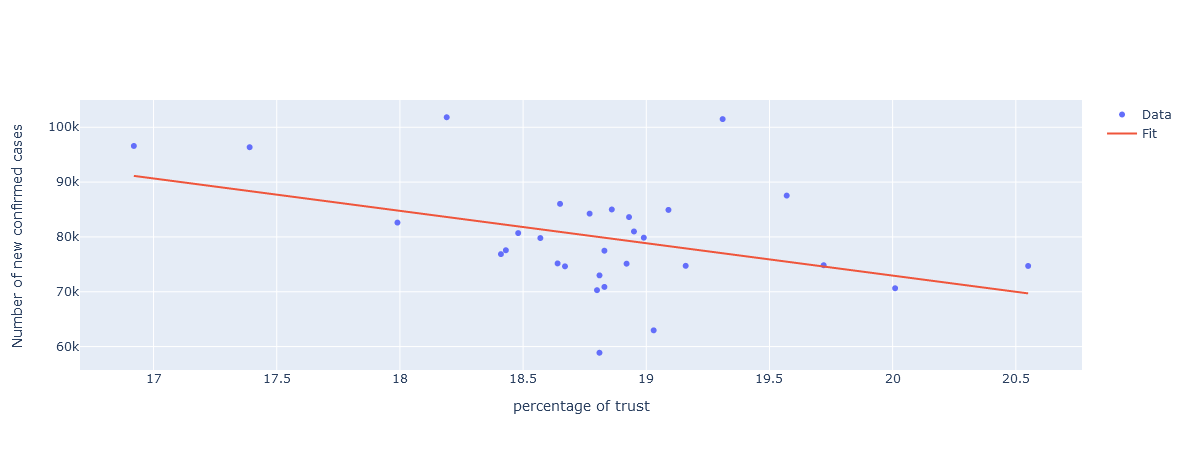

(trust, New_Confirmed): (-0.40546196456516215, 0.02622256558807916)


In [21]:
conclusion('trust', 'New_Confirmed', 1)

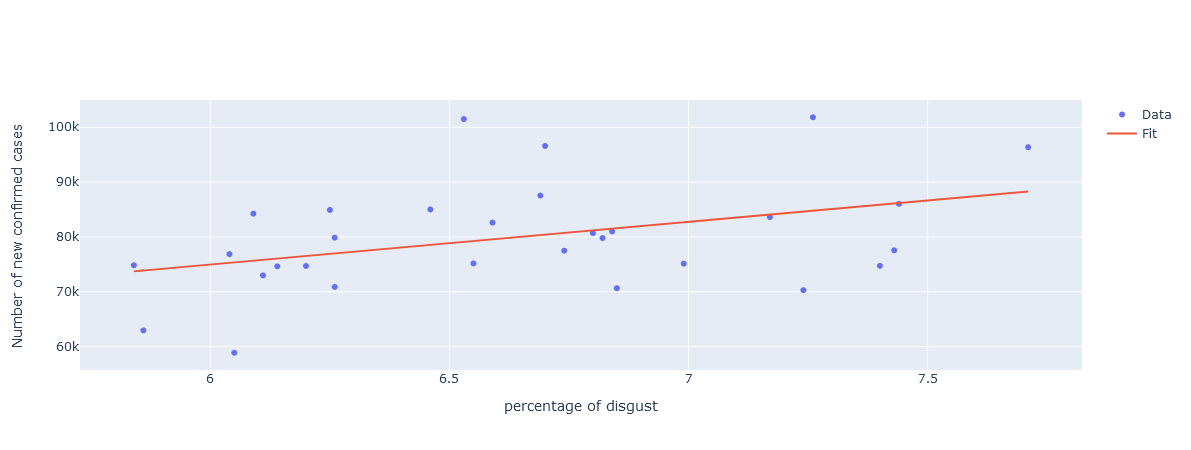

(disgust, New_Confirmed): (0.403726292605874, 0.02693352971256318)


In [22]:
conclusion('disgust', 'New_Confirmed', 1)

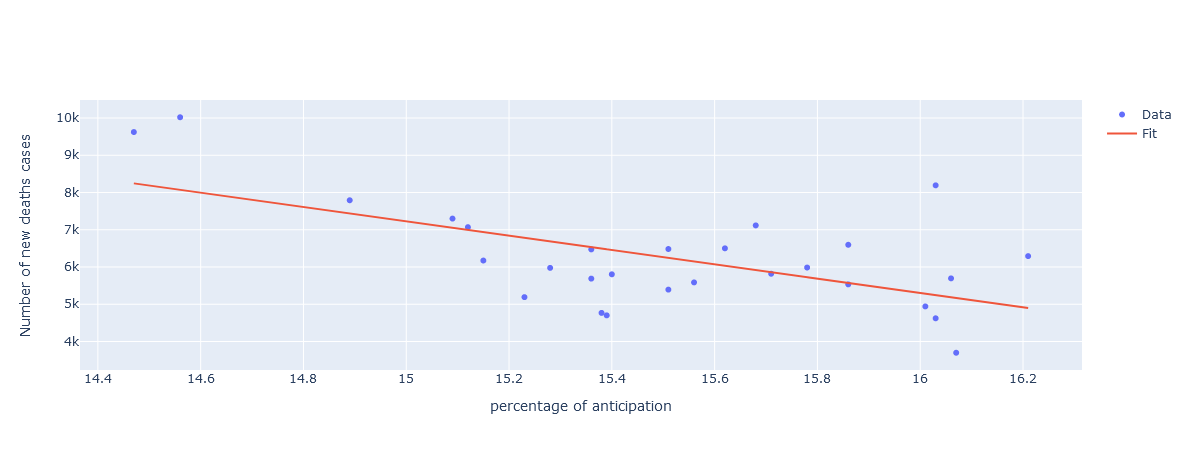

(anticipation, New_Deaths): (-0.6052161629457705, 0.0006444750273651023)


In [23]:
conclusion('anticipation', 'New_Deaths', 3)

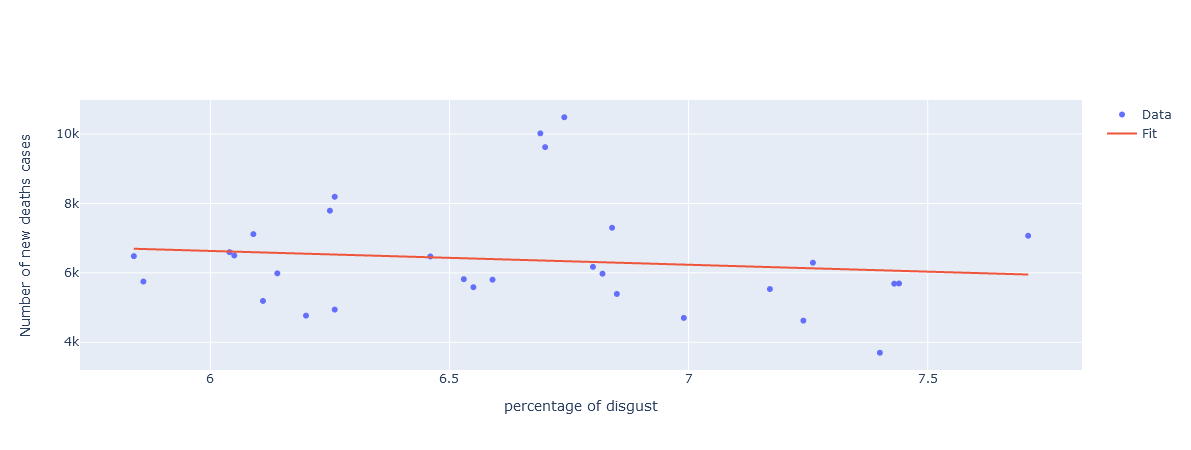

(disgust, New_Deaths): (-0.1308799035339555, 0.49058875436083577)


In [24]:
conclusion('disgust', 'New_Deaths', 1)

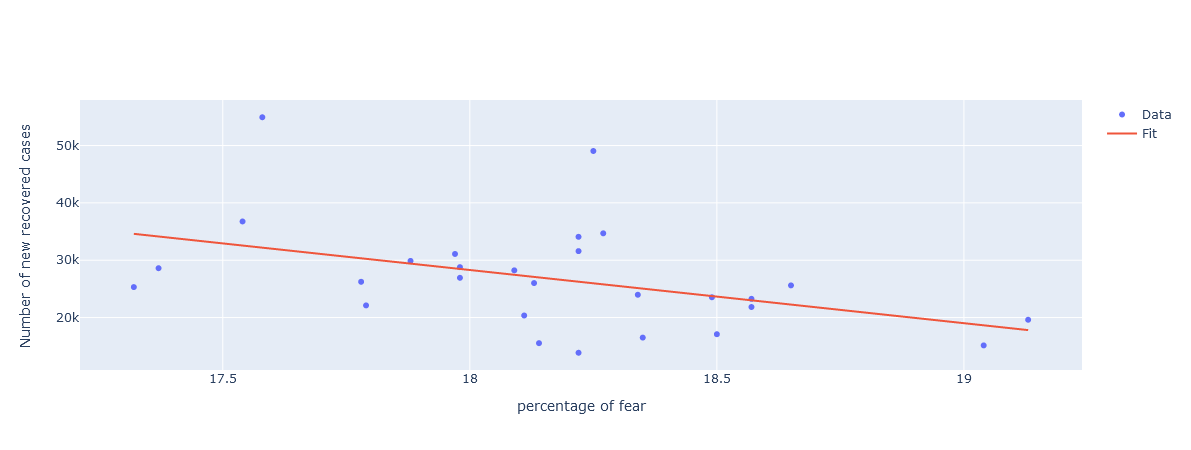

(fear, New_Recovered): (-0.4320824253167828, 0.02166677573910246)


In [25]:
conclusion('fear', 'New_Recovered', 3)

In [8]:
conclusion('anticipation', 'New_Recovered', -1)

(anticipation, New_Recovered): (0.4989204072583056, 0.00500826736268453)


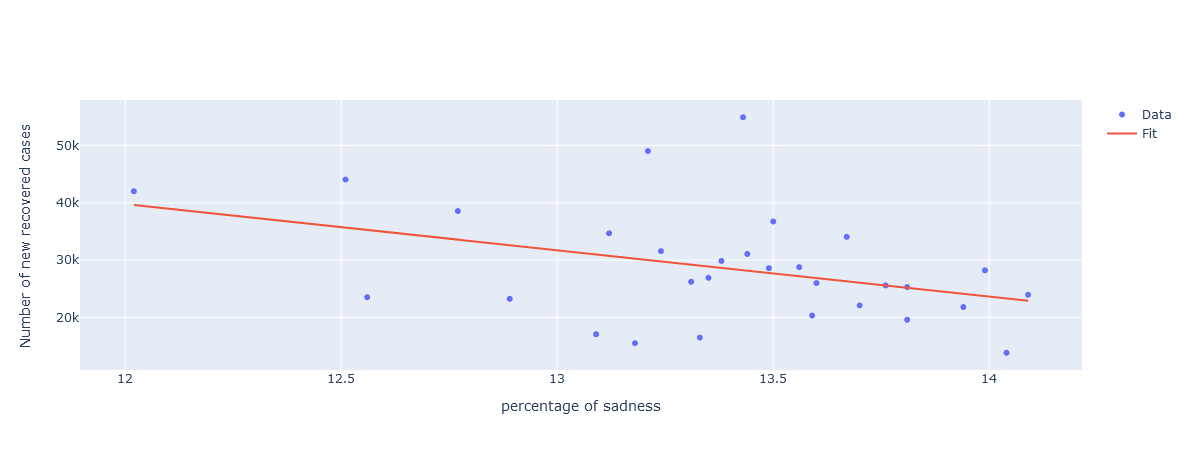

(sadness, New_Recovered): (-0.3931609950363575, 0.03160787749068731)


In [27]:
conclusion('sadness', 'New_Recovered', -1)

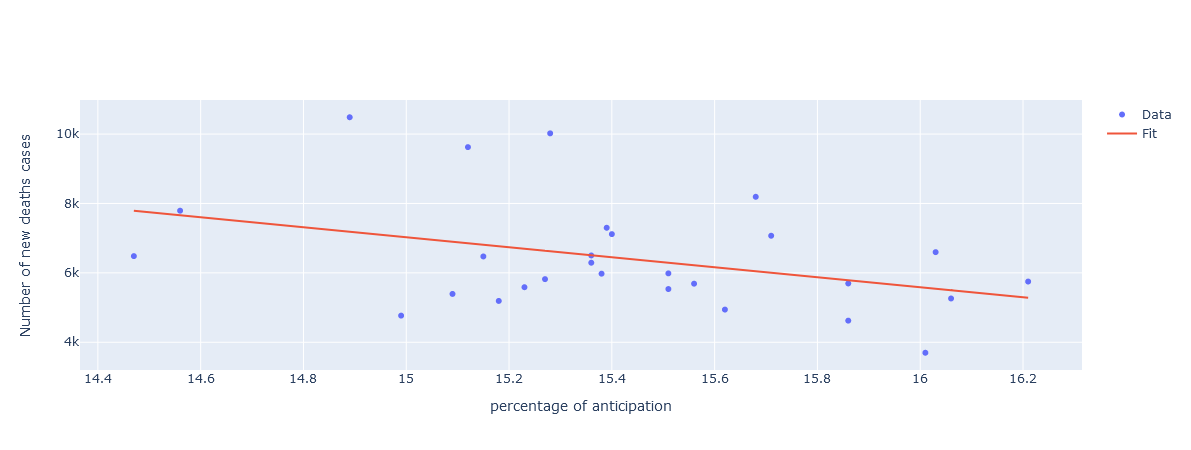

(anticipation, New_Deaths): (-0.38147037120331767, 0.04517821421728385)


In [28]:
conclusion('anticipation', 'New_Deaths', -3)